# ENTREGA 1

Objetivo: Cargar el archivo train.csv y hacer exploraciones

In [2]:
# Install kaggle

!pip install kaggle

In [3]:
# Conect Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Kaggle API Token

! mkdir ~/.kaggle
! cp /content/drive/MyDrive/UdeA/S5/ModelsSimulation1/Project/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
# Download competition "UDEA/ai4eng 20251 - Pruebas Saber Pro Colombia"

! kaggle competitions download -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia

In [8]:
# Unzip

!pip install patool
import patoolib
patoolib.extract_archive("udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip",outdir="/content")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.3/86.3 kB 2.0 MB/s eta 0:00:00


INFO patool: Extracting udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip ...
INFO:patool:Extracting udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip ...
INFO patool: running /usr/bin/7z x -aou -o/content -- udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip
INFO:patool:running /usr/bin/7z x -aou -o/content -- udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip
INFO patool: ... udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip extracted to `/content'.
INFO:patool:... udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip extracted to `/content'.


'/content'

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('train.csv')
df

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Si,...,N,No,Si,Si,Secundaria (Bachillerato) incompleta,bajo,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo,0.286,0.240,0.314,0.287
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,No,...,N,Si,Si,No,Primaria completa,bajo,0.132,0.426,0.261,0.328


## Exploration

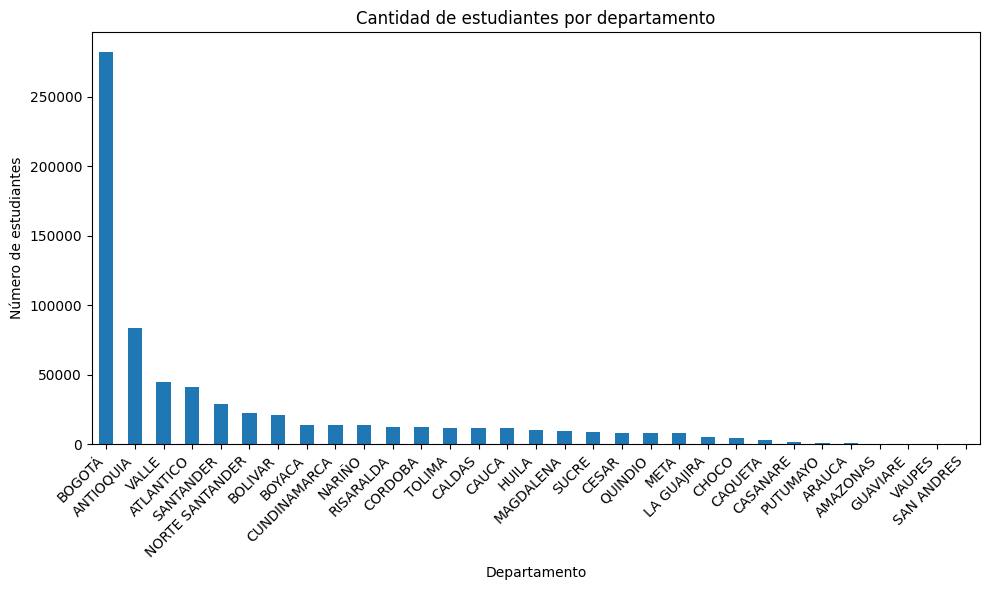

In [36]:
# Estudiantes por departamento

conteo_carreras = df['ESTU_PRGM_DEPARTAMENTO'].value_counts()

plt.figure(figsize=(10, 6))
conteo_carreras.plot(kind='bar')
plt.title('Cantidad de estudiantes por departamento')
plt.xlabel('Departamento')
plt.ylabel('Número de estudiantes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

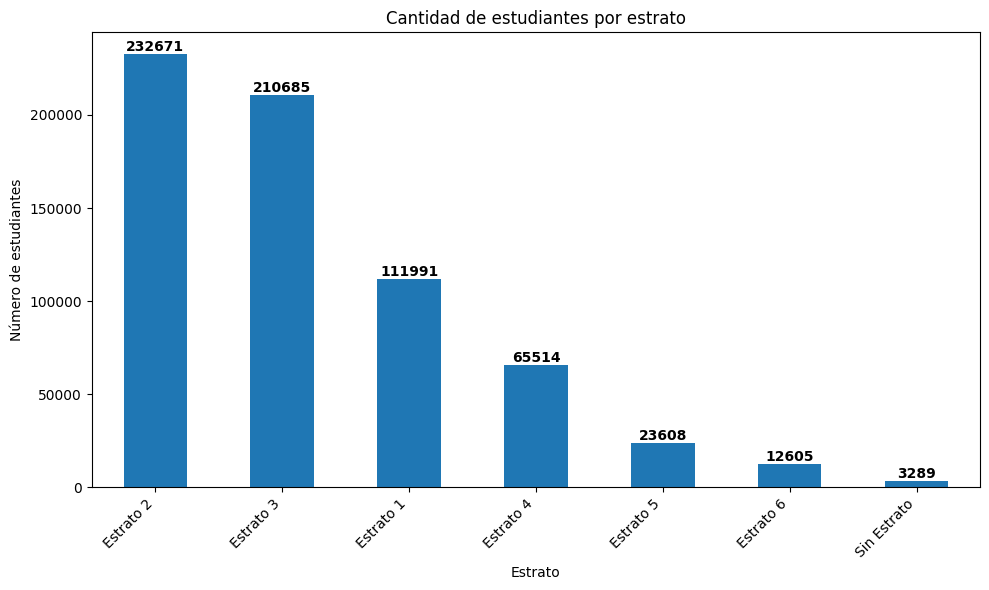

In [38]:
# Estrato

conteo_estrato = df['FAMI_ESTRATOVIVIENDA'].value_counts()

plt.figure(figsize=(10, 6))
ax = conteo_estrato.plot(kind='bar', color='skyblue')
conteo_estrato.plot(kind='bar')
plt.title('Cantidad de estudiantes por estrato')
plt.xlabel('Estrato')
plt.ylabel('Número de estudiantes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
for i, value in enumerate(conteo_estrato.values):
    ax.text(i, value + 5, str(value), ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.show()

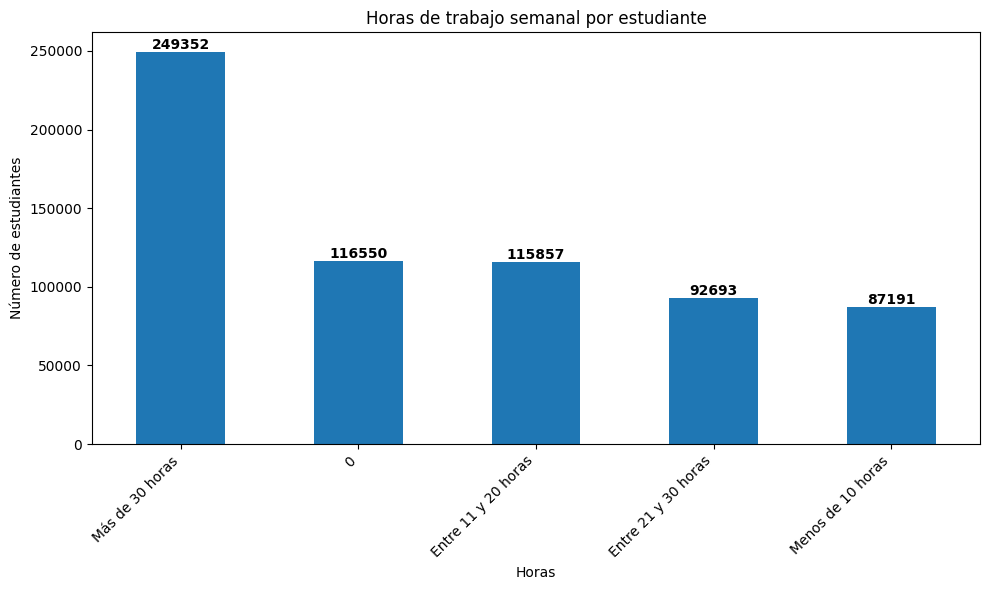

In [39]:
# Horas de trabajo semanal

conteo_trabajo = df['ESTU_HORASSEMANATRABAJA'].value_counts()

plt.figure(figsize=(10, 6))
ax = conteo_trabajo.plot(kind='bar', color='skyblue')
conteo_trabajo.plot(kind='bar')
plt.title('Horas de trabajo semanal por estudiante')
plt.xlabel('Horas')
plt.ylabel('Número de estudiantes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
for i, value in enumerate(conteo_trabajo.values):
    ax.text(i, value + 5, str(value), ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.show()

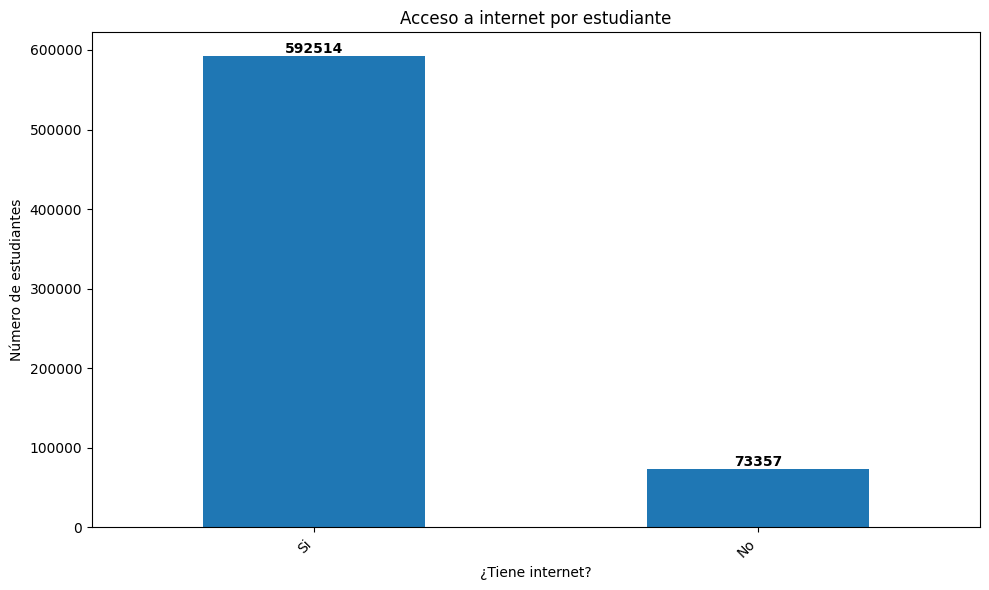

In [40]:
# Acceso a internet

conteo_internet = df['FAMI_TIENEINTERNET.1'].value_counts()

plt.figure(figsize=(10, 6))
ax = conteo_internet.plot(kind='bar', color='skyblue')
conteo_internet.plot(kind='bar')
plt.title('Acceso a internet por estudiante')
plt.xlabel('¿Tiene internet?')
plt.ylabel('Número de estudiantes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
for i, value in enumerate(conteo_internet.values):
    ax.text(i, value + 5, str(value), ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.show()

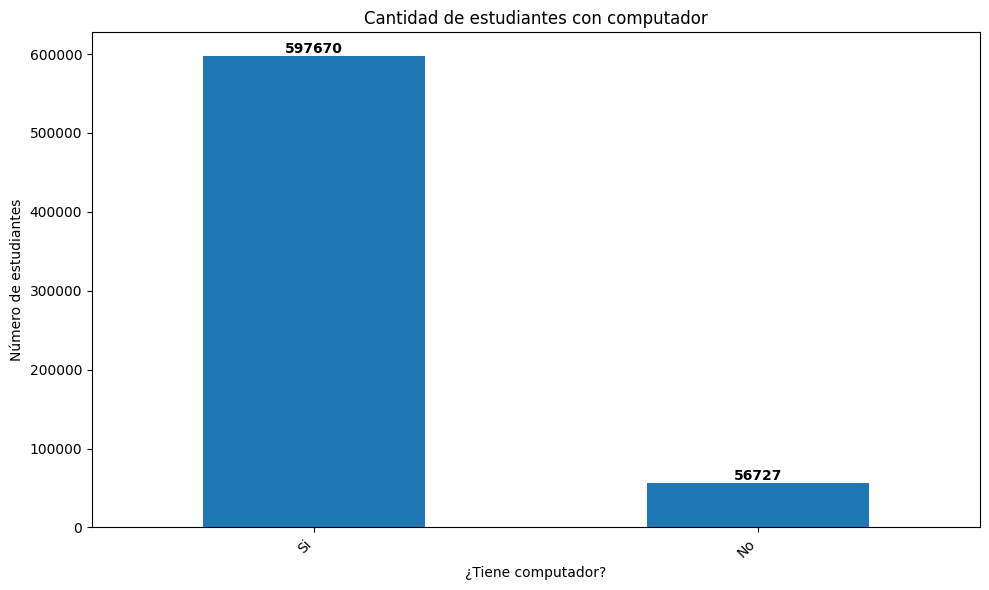

In [42]:
# Tiene computador

conteo_computador = df['FAMI_TIENECOMPUTADOR'].value_counts()

plt.figure(figsize=(10, 6))
ax = conteo_computador.plot(kind='bar', color='skyblue')
conteo_computador.plot(kind='bar')
plt.title('Cantidad de estudiantes con computador')
plt.xlabel('¿Tiene computador?')
plt.ylabel('Número de estudiantes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
for i, value in enumerate(conteo_computador.values):
    ax.text(i, value + 5, str(value), ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.show()

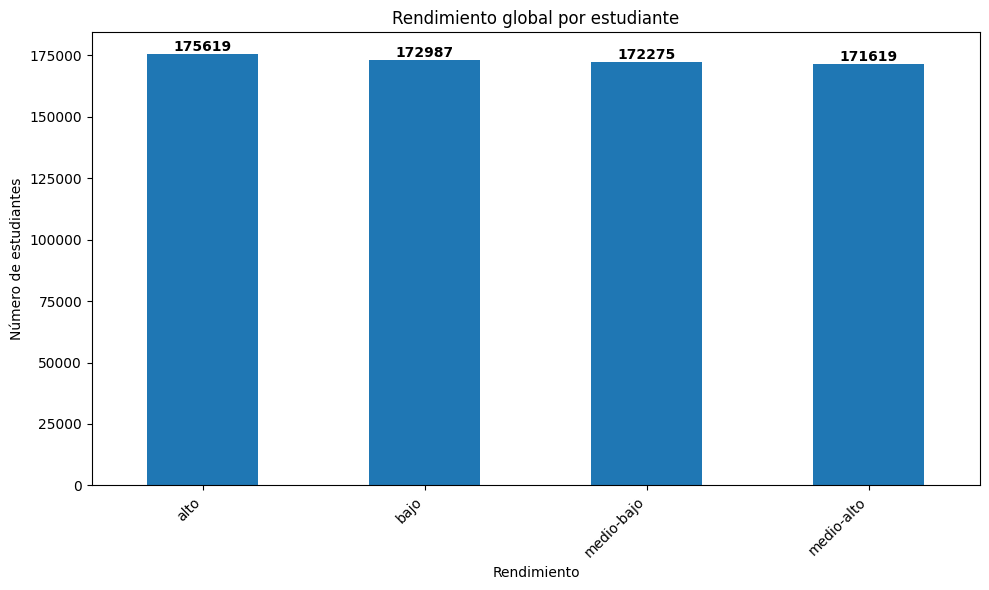

In [43]:
# Rendimiento global

rendimiento = df['RENDIMIENTO_GLOBAL'].value_counts()

plt.figure(figsize=(10, 6))
ax = rendimiento.plot(kind='bar', color='skyblue')
rendimiento.plot(kind='bar')
plt.title('Rendimiento global por estudiante')
plt.xlabel('Rendimiento')
plt.ylabel('Número de estudiantes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
for i, value in enumerate(rendimiento.values):
    ax.text(i, value + 5, str(value), ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.show()